In [1]:
import pandas as pd
import xgboost as xgp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Interactive Data Visualization
import sys

In [67]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
volume_df = pd.read_csv('../data_mine/volume_data.csv')
facility_df = pd.read_csv('../data/facility_data.csv')
to_drop_cols =['order_number', 'Unnamed: 0','facilities', 'facility_id', 'operation_sequence', 'total_quantity_complete', 'facility_description', 'operation_status', 'total_quantity_scrap', 'start', 'fin', 'B0010', 'C0010', 'D0010', 'facilities']
columns_to_divide = ['B0021', 'F0010', 'B0010', 'K0010', 'K0020', 'B0012', 'B0020', 'B0040', 'B0070', 'B0080',
                      'C0040', 'C0060', 'C0080', 'C0010', 'C0020', 'J0020', 'H0020', 'D0010', 'H0070', 'H0010',
                      'D0020', 'H0030', 'C0050', 'C0100', 'C0110', 'J0025', 'B0025', 'C0075', 'B0060', 'B0090',
                      'C0090', 'B0030', 'C0070', 'K0011', 'H0046', 'H0050', 'B0050', 'H0060', 'B0015', 'H0045',
                      'B0062', 'J0060', 'H0051', 'J0050', 'C0030', 'C0031', 'F0020', 'C0035']
substrings = ['GL', 'J', 'K']
for i in volume_df.columns:    
    if any(sub in i for sub in substrings):
        to_drop_cols.append(i)
volume_df[columns_to_divide] = volume_df[columns_to_divide] / 1000
volume_df.head()

,order_number,Unnamed: 0,operation_sequence,facility_id,total_quantity_complete,total_quantity_scrap,facility_description,operation_status,start,fin,B0021,F0010,B0010,K0010,K0020,B0012,B0020,B0040,B0070,B0080,C0040,C0060,C0080,C0010,C0020,J0020,H0020,D0010,H0070,H0010,D0020,H0030,C0050,C0100,C0110,J0025,B0025,C0075,B0060,B0090,C0090,B0030,C0070,K0011,H0046,H0050,B0050,H0060,B0015,H0045,B0062,J0060,H0051,J0050,C0030,C0031,F0020,C0035,y,len
0,M875305,1861,90,F0010,1,0,WASHING & WIPING RAIL,40,2021-10-08 13:54:28+00:00,2021-11-29 15:37:54+00:00,805.20,1001.059,NaN,249.064,76.910,538.302,3566.93,546.714,1210.318,1129.798,86.26,2359.0389,959.316,NaN,362.858,132.906,NaN,NaN,3.168,NaN,15.918,154.410,NaN,NaN,2.08,NaN,6976.839,797.478,6181.614,203.68,591.260,639.42,48.04,60.72,3.168,3.320,624.7,4.144,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1249.0,2180.0
1,M919255,2507,90,F0010,4,0,WASHING & WIPING RAIL,40,2021-10-08 13:22:07+00:00,2021-11-29 15:38:08+00:00,805.20,1027.629,NaN,245.304,119.006,446.962,3566.93,546.714,1210.318,1144.898,86.26,2373.9389,937.636,NaN,358.378,139.186,NaN,NaN,3.168,NaN,15.918,154.410,NaN,NaN,2.08,NaN,6976.839,808.471,6257.614,127.68,596.761,639.42,48.04,44.88,3.168,3.320,624.7,4.144,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.0,2674.0
2,M914207,3370,90,F0010,5,0,WASHING & WIPING RAIL,40,2022-03-04 16:18:11+00:00,2022-04-08 20:37:29+00:00,3369.92,566.756,NaN,245.505,83.880,804.416,1936.27,228.642,296.000,259.606,116.10,3261.2350,919.530,NaN,807.733,157.952,3.4,NaN,NaN,NaN,23.910,508.946,NaN,36.22,NaN,NaN,2690.400,970.874,5073.992,1087.70,286.362,225.60,39.60,30.72,3.040,24.284,303.0,24.880,44.0,1.16,386.0,NaN,4.98,NaN,NaN,NaN,NaN,NaN,844.0,2480.0
3,M899965,7847,110,K0020,5,0,WRAPPING & PACKAGING,40,2021-10-08 14:09:09+00:00,2021-11-29 16:28:46+00:00,805.20,871.901,NaN,358.440,106.910,750.440,3566.93,546.714,1210.318,1129.798,86.26,2359.0389,949.886,NaN,362.858,132.906,NaN,NaN,3.168,NaN,15.000,154.410,NaN,NaN,2.08,NaN,6976.839,788.178,6181.614,203.68,605.170,639.42,48.04,60.72,3.168,3.320,624.7,4.144,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.0,1346.0
4,M876923,9215,90,F0010,2,0,WASHING & WIPING RAIL,40,2021-08-24 17:23:23+00:00,2021-11-05 12:25:59+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1747.0,2480.0


In [68]:
for i in facility_df.itertuples():            
    for f in i.facilities.split(' '):
        if len(f) == 5:
            facility_df.loc[i[0], f + '_one_hot'] = 1
facility_df['product_family'] = facility_df['product_family'].astype('category')
facility_df['product_model'] = facility_df['product_model'].astype('category')
one_hot_encoded = pd.get_dummies(facility_df, columns=['product_family', 'product_model']) 
one_hot_encoded.columns
# facility_df = pd.concat([facility_df, one_hot_encoded_datab], axis=1)
# facility_df.columns
merged_df = volume_df.merge(one_hot_encoded, how='inner', on='order_number')
df = merged_df.drop(columns=to_drop_cols)
df = df[df['B0021'].notna()]
df = df[df['y'] > 12]
df = df.fillna(0)

In [69]:
sorted_cols = sorted(df.columns.to_list())
df = df[sorted_cols]

In [70]:
df.columns

Index(['B0010_one_hot', 'B0012', 'B0012_one_hot', 'B0015', 'B0020',
       'B0020_one_hot', 'B0021', 'B0021_one_hot', 'B0025', 'B0030', 'B0040',
       'B0040_one_hot', 'B0050', 'B0060', 'B0062', 'B0070', 'B0070_one_hot',
       'B0080', 'B0080_one_hot', 'B0090', 'C0010_one_hot', 'C0020',
       'C0020_one_hot', 'C0030', 'C0031', 'C0035', 'C0040', 'C0040_one_hot',
       'C0050', 'C0050_one_hot', 'C0060', 'C0060_one_hot', 'C0070', 'C0075',
       'C0080', 'C0080_one_hot', 'C0090', 'C0100', 'C0100_one_hot', 'C0110',
       'C0110_one_hot', 'D0010_one_hot', 'D0020', 'D0020_one_hot', 'F0010',
       'F0010_one_hot', 'F0020', 'H0010', 'H0010_one_hot', 'H0020',
       'H0020_one_hot', 'H0030', 'H0030_one_hot', 'H0045', 'H0046', 'H0050',
       'H0051', 'H0060', 'H0070', 'H0070_one_hot', 'J0020_one_hot',
       'J0025_one_hot', 'K0010_one_hot', 'K0020_one_hot', 'len',
       'product_family_HSR', 'product_family_SHS', 'product_model_55',
       'product_model_65', 'y'],
      dtype='object')

In [71]:
df.describe()

,B0010_one_hot,B0012,B0012_one_hot,B0015,B0020,B0020_one_hot,B0021,B0021_one_hot,B0025,B0030,B0040,B0040_one_hot,B0050,B0060,B0062,B0070,B0070_one_hot,B0080,B0080_one_hot,B0090,C0010_one_hot,C0020,C0020_one_hot,C0030,C0031,C0035,C0040,C0040_one_hot,C0050,C0050_one_hot,C0060,C0060_one_hot,C0070,C0075,C0080,C0080_one_hot,C0090,C0100,C0100_one_hot,C0110,C0110_one_hot,D0010_one_hot,D0020,D0020_one_hot,F0010,F0010_one_hot,F0020,H0010,H0010_one_hot,H0020,H0020_one_hot,H0030,H0030_one_hot,H0045,H0046,H0050,H0051,H0060,H0070,H0070_one_hot,J0020_one_hot,J0025_one_hot,K0010_one_hot,K0020_one_hot,len,product_family_HSR,product_family_SHS,product_model_55,product_model_65,y
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.00000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.888366,595.056967,0.864156,70.710854,3354.186315,0.887021,2410.252065,0.887021,4528.297721,241.873934,716.727607,0.933423,481.749601,4156.277008,727.534633,543.351088,0.980498,657.445473,0.983860,523.263711,0.096839,618.600144,0.093477,0.779578,0.104748,0.020646,90.702495,0.513786,2.131498,0.006725,1575.708292,0.984533,28.556984,679.914318,709.078409,0.984533,423.850861,15.973400,0.005380,2.34220,0.005380,0.012777,21.288989,0.010760,660.010846,0.996638,0.080868,8.307808,0.005380,4.736655,0.008742,407.876687,0.008742,0.884412,12.822582,4.790453,5.556913,6.840976,10.729477,0.008742,0.034970,0.000672,0.755884,0.750504,2290.865501,0.336247,0.663753,0.523201,0.476799,933.575656
std,0.315022,358.210341,0.342738,63.842189,1101.304228,0.316674,1257.313075,0.316674,2761.554032,318.385215,425.659929,0.249372,321.264004,1074.544769,722.874819,290.266129,0.138329,316.699603,0.126056,264.351619,0.295838,269.217224,0.291197,3.480119,0.906139,0.355560,68.687190,0.499978,4.381718,0.081757,766.998755,0.123444,24.124602,191.287573,185.805017,0.123444,222.273567,13.947932,0.073175,4.36487,0.073175,0.112350,20.419953,0.103205,241.825744,0.057909,0.506411,9.466800,0.073175,7.484187,0.093123,139.077249,0.093123,1.254338,15.721319,5.831652,8.063258,5.976557,23.106329,0.093123,0.183765,0.025933,0.429706,0.432867,1848.058583,0.472584,0.472584,0.499629,0.499629,471.559522
min,0.000000,0.000000,0.000000,0.000000,801.849000,0.000000,504.340000,0.000000,0.000000,0.000000,37.196000,0.000000,0.000000,1157.280000,0.000000,0.000000,0.000000,179.636000,0.000000,0.000000,0.000000,87.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.670000,0.000000,0.000000,340.294000,292.403000,0.000000,41.200000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,138.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,1.000000,272.815000,1.000000,40.000000,2528.204000,1.000000,1465.730000,1.000000,2305.550000,0.000000,347.880000,1.000000,210.000000,3332.617000,98.000000,296.000000,1.000000,374.352000,1.000000,341.260000,0.000000,390.642000,0.000000,0.000000,0.000000,0.000000,37.365000,0.000000,0.000000,0.000000,1063.100000,1.000000,3.547000,538.059000,591.571000,1.000000,260.840000,4.460000,0.000000,0.00000,0.000000,0.000000,6.560000,0.000000,457.729000,1.00

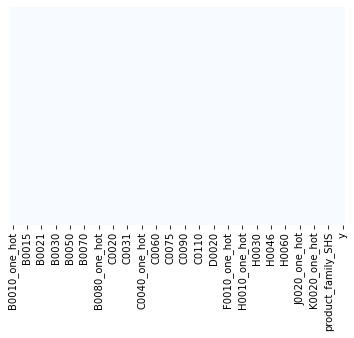

In [72]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

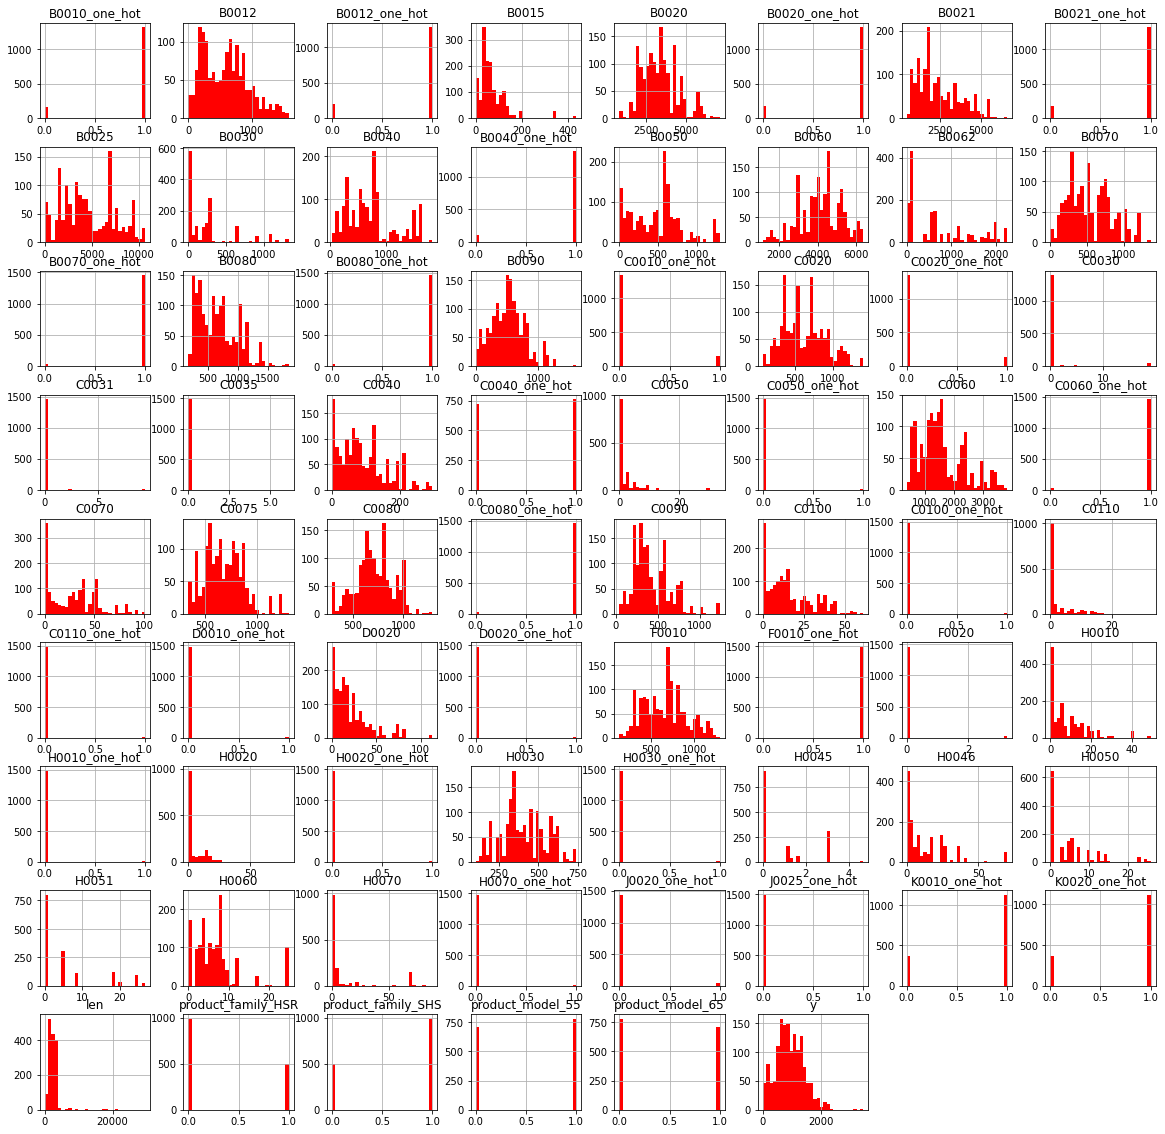

In [73]:
df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

In [74]:
X = df.drop(columns = ['y'])
y = df['y']

X = np.array(X)
y = np.array(y)

y = y.reshape(-1,1)
y.shape

(1487, 1)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [76]:
X_train.shape

(1115, 69)

In [77]:
print(X_test.shape)

(372, 69)


In [78]:
# scaling the data before training the model
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler_x = StandardScaler()
# X = scaler_x.fit_transform(X)
# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [80]:

import xgboost as xgb


model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7992384495194885


In [82]:
y_predict = model.predict(X_test)


In [83]:
y_predict

array([1466.6787  ,  882.5491  ,  459.12604 ,  825.09216 ,  731.23816 ,
       1034.4902  , 1289.6664  , 1125.929   ,  307.056   ,  623.00397 ,
       1102.0873  , 1515.7162  , 1300.6173  , 1419.3276  , 1502.9075  ,
       1790.2958  ,  474.40372 ,  164.2908  ,  459.3919  , 1348.0973  ,
       1429.4661  , 1371.1771  , 1364.4326  ,  612.1161  ,  815.6775  ,
       1095.6377  , 1144.5963  ,  984.2627  ,  171.3931  , 1081.5663  ,
       1482.4061  ,  865.9446  , 1335.4136  ,  742.9612  , 1027.5001  ,
        839.7125  ,  652.77954 , 1291.5715  ,  534.63165 ,  956.9286  ,
        517.16315 ,  459.3919  , 1081.005   , 1315.5707  ,  874.1805  ,
       1335.6956  , 1864.7957  ,  197.3106  , 1261.4421  , 1160.9691  ,
        555.9815  ,  942.3696  , 1307.702   ,  897.0838  ,  628.4716  ,
       1298.3451  ,  820.5563  ,  614.98895 ,  778.416   ,  190.9345  ,
        583.7423  ,  559.327   ,  849.1126  , 1320.8915  , 1574.1417  ,
       1140.303   ,  817.9587  ,  187.13547 , 1200.3257  ,  724.

In [84]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 195.064 
MSE = 38050.086105239134 
MAE = 99.23841143167147 
R2 = 0.7992384495194885 
Adjusted R2 = 0.7533690886481134
